In [1]:
import msd_analysis as msd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Set up parameters
n_steps_values = np.logspace(5, 9, 9, base=2, dtype=int)  
max_lag_values = np.logspace(5, 9, 9, base=2, dtype=int)

n_simulations = 4096
n_particles = 128

# Run analysis with time averaging
print("Running analysis with time averaging...")
results_with = msd.run_analysis(
    n_steps_values, max_lag_values,
    n_simulations=n_simulations,  # Use 1024 for publication quality
    n_particles=n_particles,
    random_seed=42,
    time_average=True
)

# Run analysis without time averaging (diagonal only)
print("Running analysis without time averaging...")
results_without = msd.run_analysis(
    n_steps_values, max_lag_values,
    n_simulations=n_simulations,
    n_particles=n_particles,
    random_seed=42,
    time_average=False
)

# Convert to DataFrames
df_with = msd.results_to_dataframe(results_with)
df_without = msd.results_to_dataframe(results_without)
df_all = pd.concat([df_with, df_without], ignore_index=True)

filename = f'../data/msd_results_nsim{n_simulations}_npart{n_particles}.csv'
df_all.to_csv(filename, index=False)
print(f"Results saved to {filename}")

Running analysis with time averaging...
Analyzing 45 conditions with time averaging


Conditions:   0%|          | 0/45 [00:00<?, ?it/s]

Running analysis without time averaging...
Analyzing 9 conditions without time averaging


Conditions:   0%|          | 0/9 [00:00<?, ?it/s]

Results saved to ../data/msd_results_nsim4096_npart128.csv


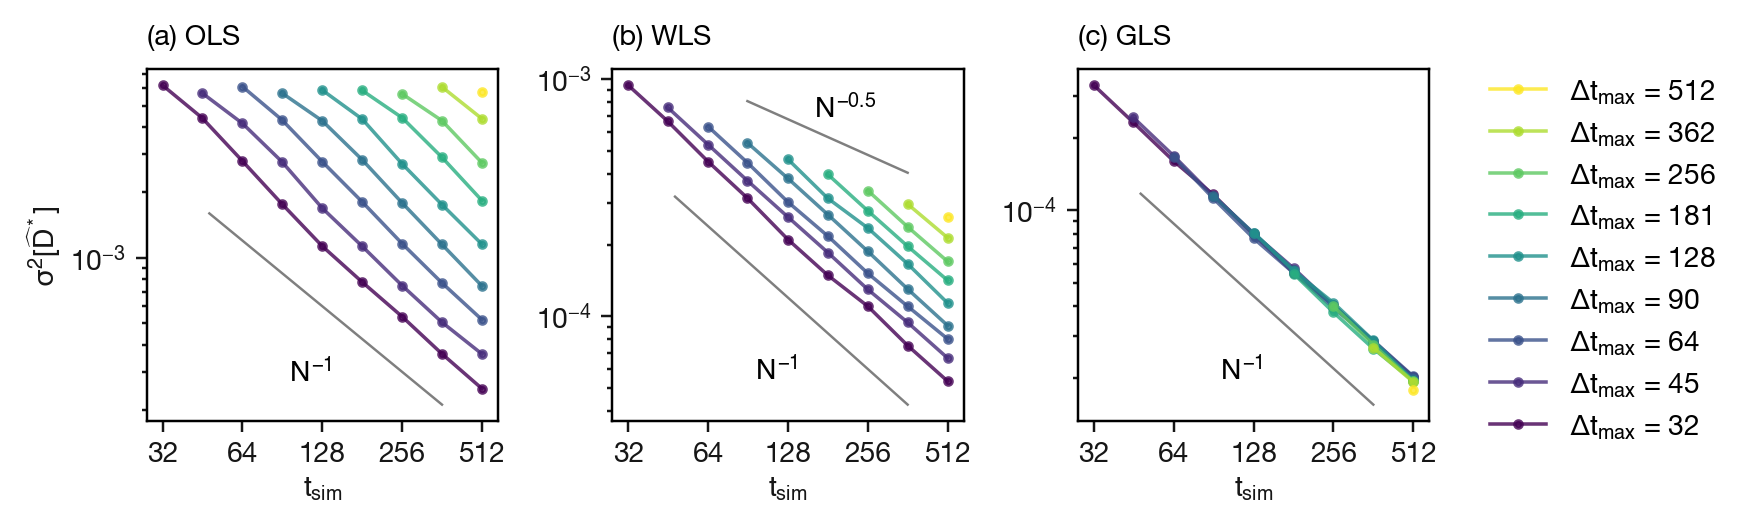

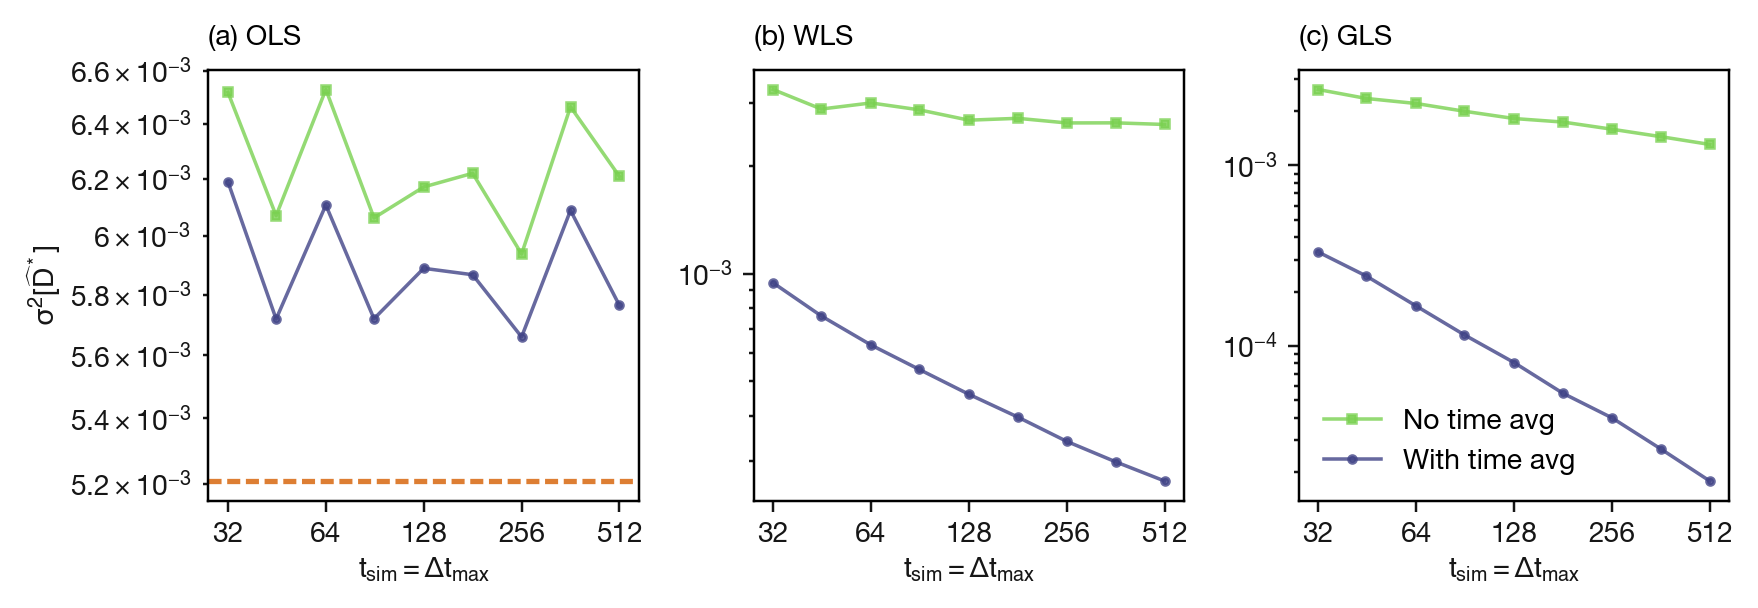

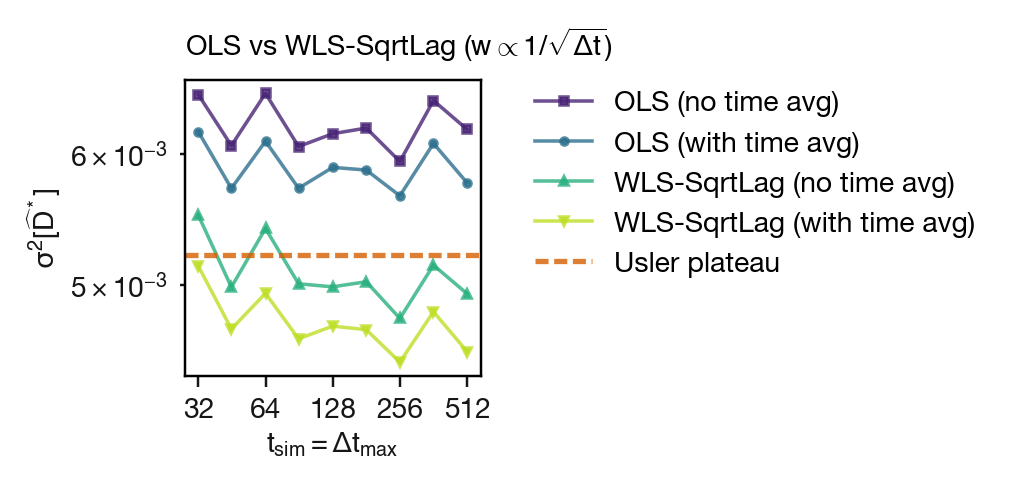

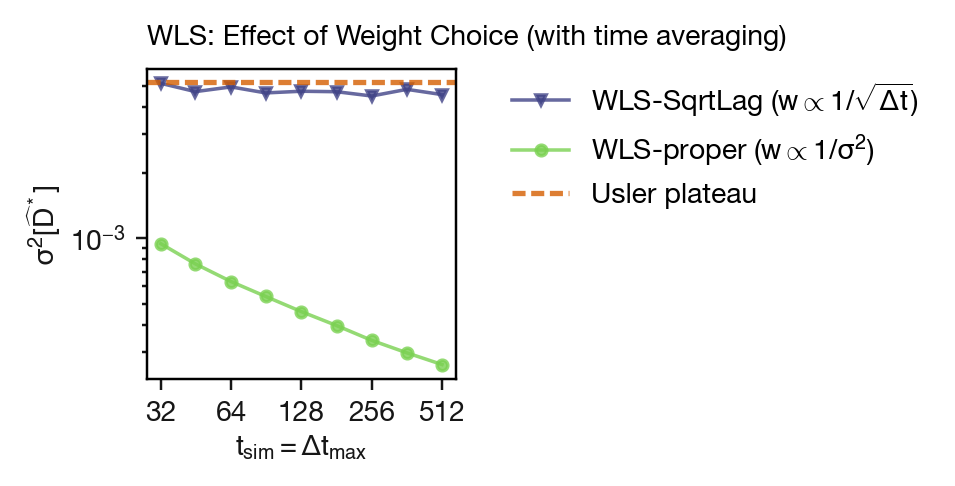

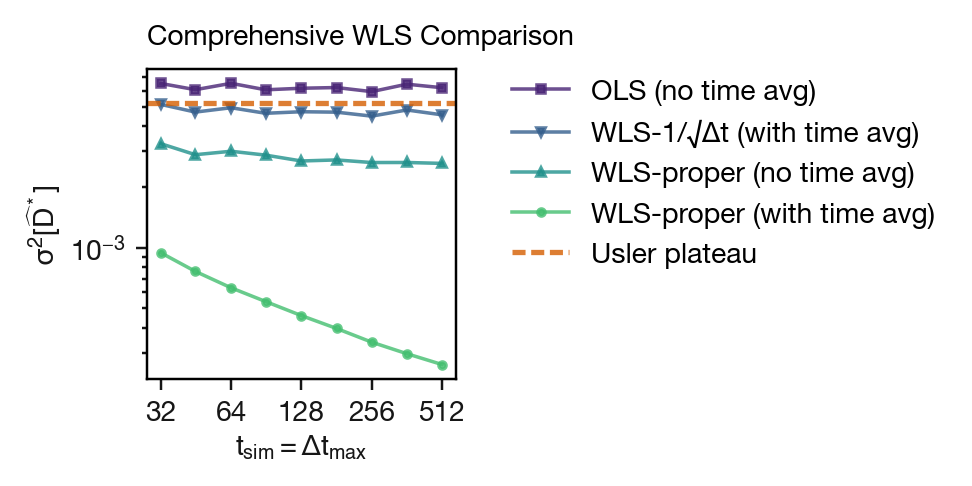

In [2]:
# 1. Main variance comparison plot (OLS, WLS, GLS)
fig1 = msd.plot_all_methods(df_with)
plt.show()

# 2. Time averaging comparison
fig2 = msd.plot_comparison_time_averaging(df_all)
plt.show()

# 3. OLS vs WLS-SqrtLag comparison
fig3 = msd.plot_ols_vs_wls_sqrtlag(df_all)
plt.show()

# 4. WLS weight scheme comparison
fig4 = msd.plot_wls_comparison(df_all)
plt.show()

# Comparison of Usler's "Variant A" and "Variant B"
# with WLS with correct weights (both time-averaged and non-time-averaged)
fig5 = msd.plot_comprehensive_wls_comparison(df_all)
plt.show()
